# *E.coli* Core Model Subsystems

Set the model environment (**Do not use the 'textbook' model it does not contain subsystems**)

In [1]:
import cobra
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)

# Load the model included in the directory or download the model from the BIGG database
model = cobra.io.load_json_model('e_coli_core.json') # Model must be in the same directory

# Introduction
This tutorial will explore the operation of the *E.coli* core model by looking at each of the model subsystems.The different subsystems can be found to be.

In [2]:
reaction_subsystem = [r.subsystem for r in model.reactions]
df2 = pd.DataFrame(reaction_subsystem)
df3 = df2.drop_duplicates()
df3

0
0               Glycolysis/Gluconeogenesis
1                      Pyruvate Metabolism
4                Pentose Phosphate Pathway
6                 Transport, Extracellular
8   Inorganic Ion Transport and Metabolism
12                   Anaplerotic reactions
13                       Citric Acid Cycle
15       Biomass and maintenance functions
19               Oxidative Phosphorylation
43                  Extracellular exchange
74                    Glutamate Metabolism

The subsystems for each of the models reactions are given below.

In [3]:
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula','Reaction Subsystem'])
pd.set_option('display.max_rows', 500)
df

Reaction ID                                         Reaction Name                                                                                                                                                                                                                                                                                                                                          Reaction Formula                      Reaction Subsystem
0                        PFK                                   Phosphofructokinase                                                                                                                                                                                                                                                                                                                     atp_c + f6p_c --> adp_c + fdp_c + h_c              Glycolysis/Gluconeogenesis
1                        PFL                                Pyruvate formate lyase                                                                                                                                                                                                                                                                                                                         coa_c + pyr_c --> accoa_c + for_c                     Pyruvate Metabolism
2                        PGI                         Glucose-6-phosphate isomerase                                                                                                                                                                                                                                                                                                                                           g6p_c <=> f6p_c              Glycolysis/Gluconeogenesis
3                        PGK                               Phosphoglycerate kinase                                                                                                                                                                                                                                                                                                                         3pg_c + atp_c <=> 13dpg_c + adp_c              Glycolysis/Gluconeogenesis
4                        PGL                             6-phosphogluconolactonase                                                                                                                                                                                                                                                                                                                           6pgl_c + h2o_c --> 6pgc_c + h_c               Pentose Phosphate Pathway
5                      ACALD              Acetaldehyde dehydrogenase (acetylating)                                                                                                                                                                                                                                                                                                        acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c                     Pyruvate Metabolism
6                     AKGt2r       2 oxoglutarate reversible transport via symport                                                                                                                                                                                                                                                                                                                               akg_e + h_e <=> akg_c + h_c                Transport, Extracellular
7                        PGM                               Phosphoglycerate mutase                                                                                                                                                                                       

Ordering the 'Reaction IDs' in the table alphabetically

In [4]:
df.sort_values(by=['Reaction ID'], inplace = True)
df

Reaction ID                                         Reaction Name                                                                                                                                                                                                                                                                                                                                          Reaction Formula                      Reaction Subsystem
5                      ACALD              Acetaldehyde dehydrogenase (acetylating)                                                                                                                                                                                                                                                                                                        acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c                     Pyruvate Metabolism
10                    ACALDt                     Acetaldehyde reversible transport                                                                                                                                                                                                                                                                                                                                       acald_e <=> acald_c                Transport, Extracellular
11                      ACKr                                        Acetate kinase                                                                                                                                                                                                                                                                                                                           ac_c + atp_c <=> actp_c + adp_c                     Pyruvate Metabolism
13                    ACONTa      Aconitase (half-reaction A, Citrate hydro-lyase)                                                                                                                                                                                                                                                                                                                                cit_c <=> acon_C_c + h2o_c                       Citric Acid Cycle
14                    ACONTb   Aconitase (half-reaction B, Isocitrate hydro-lyase)                                                                                                                                                                                                                                                                                                                               acon_C_c + h2o_c <=> icit_c                       Citric Acid Cycle
17                     ACt2r       Acetate reversible transport via proton symport                                                                                                                                                                                                                                                                                                                                 ac_e + h_e <=> ac_c + h_c                Transport, Extracellular
19                      ADK1                                      Adenylate kinase                                                                                                                                                                                                                                                                                                                               amp_c + atp_c <=> 2.0 adp_c               Oxidative Phosphorylation
20                     AKGDH                          2-Oxogluterate dehydrogenase                                                                                                                                                                                       

The following is an example of how to list the reactions associated with a certain subsystem. This example is for the oxidative phosphorylation subsystem.

In [5]:
SSindex = []
for i in range(len(reaction_subsystem)):
    if reaction_subsystem[i] == 'Oxidative Phosphorylation':
        SSindex.append(i)
df.loc[SSindex]

Reaction ID                                   Reaction Name                                         Reaction Formula         Reaction Subsystem
19        ADK1                                Adenylate kinase                              amp_c + atp_c <=> 2.0 adp_c  Oxidative Phosphorylation
21      ATPS4r         ATP synthase (four protons for one ATP)       adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c  Oxidative Phosphorylation
31       CYTBD  Cytochrome oxidase bd (ubiquinol-8: 2 protons)   2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c  Oxidative Phosphorylation
36       SUCDi          Succinate dehydrogenase (irreversible)                         q8_c + succ_c --> fum_c + q8h2_c  Oxidative Phosphorylation
39        THD2                         NAD(P) transhydrogenase  2.0 h_e + nadh_c + nadp_c --> 2.0 h_c + nad_c + nadph_c  Oxidative Phosphorylation
67        FRD7                              Fumarate reductase                         fum_c + q8h2_c --> q8_c + succ_c  Oxidative Phosphorylation
90      NADH16   NADH dehydrogenase (ubiquinone-8 & 3 protons)     4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c  Oxidative Phosphorylation
91     NADTRHD                            NAD transhydrogenase                      nad_c + nadph_c --> nadh_c + nadp_c  Oxidative Phosphorylation

A map of the subsystems for the *E.coli* core model is

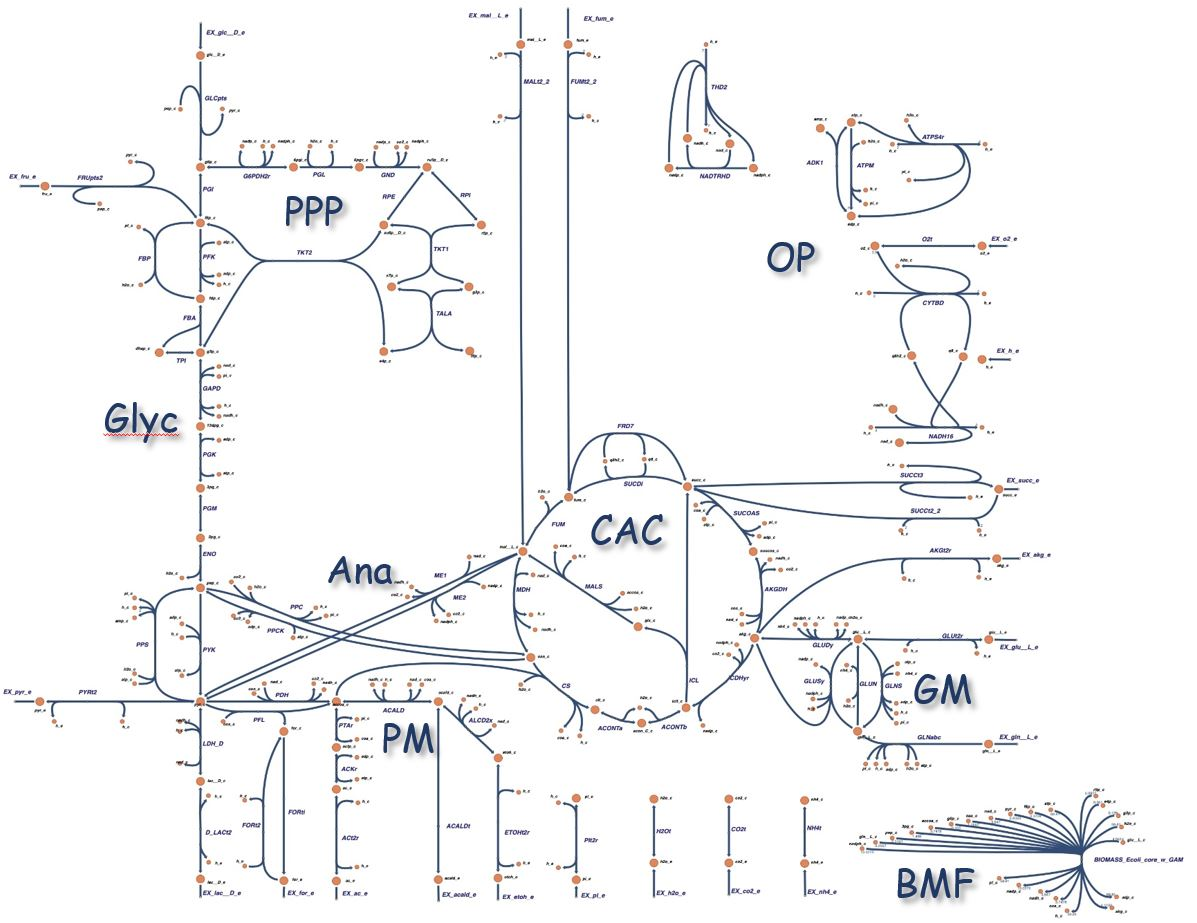

where

- Glyc – Glycolysis/Gluconeogenesis
- PPP - Pentose Phosphate Pathway
- CAC – Citric Acid Cycle
- ANA - Anaplerotic Reactions
- OP - Oxidative Phosphorylation
- PM – Pyruvate Metabolism
- GM - Glutamate Metabolism
- BM - Biomass and Maintenance Functions

Not shown on the map
- TE - Transport, Extracellular
- IITM - Inorganic Ion Transport and Metabolism
- EE - Extracellular Exchange
